In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [23]:
medical = pd.read_csv('/content/insurance.csv')
df = medical.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.isna().sum() #null deger yok

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info() #classification yapabiliriz objeler fazla

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe().T # sayısal degerlerde min max gibi durumlara baktım

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
df.corr() #sayısal degerlerin korelasyonuna bakıyorum genel olarak güclü pozitif bir iliskileri yok

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-11-2f61412c9cea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr() #sayılar ile birlikte ısı haritasında daha rahat iliskilere bakabiliriz


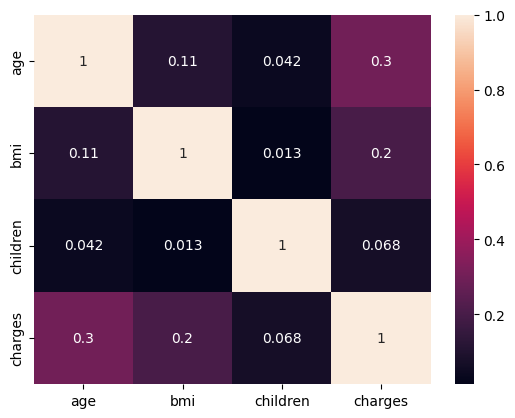

In [ ]:
corrMatrix = df.corr() #sayılar ile birlikte ısı haritasında daha rahat iliskilere bakabiliriz
sns.heatmap(corrMatrix, annot=True)
plt.show()
#Examine the relationship between “smoker” and “charges”
#Examine the relationship between “smoker” and “region”.
#Examine the relationship between “bmi” and “sex”.
#Examine the relationship between “bmi” and “charges”

In [ ]:
#negatif yönde bir iliski var

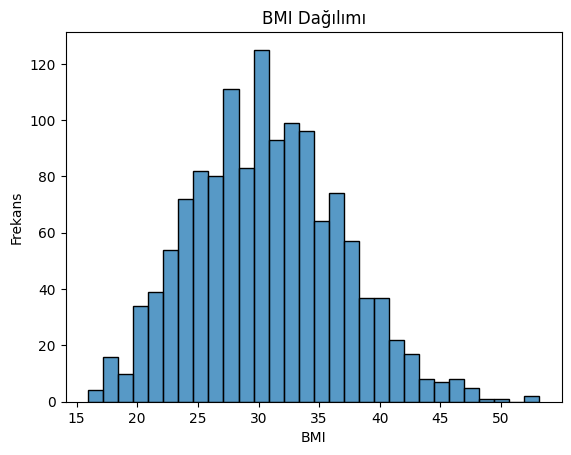

In [ ]:
sns.histplot(data=df, x='bmi', bins=30)  #25 30 arası bmi yüksek kilolu
plt.xlabel('BMI')
plt.ylabel('Frekans')
plt.title('BMI Dağılımı')
plt.show()

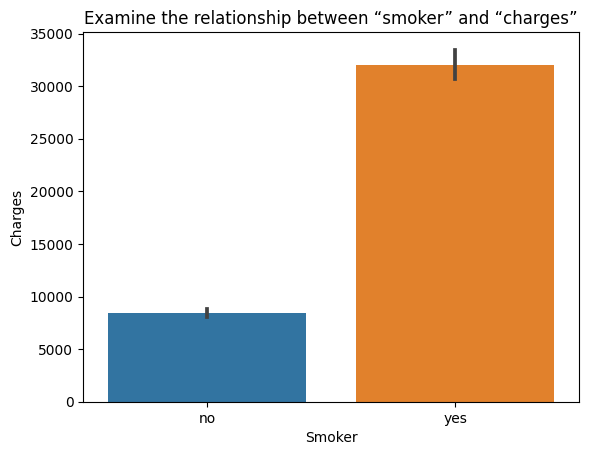

In [ ]:
sns.barplot(x="smoker", y="charges", data=df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Examine the relationship between “smoker” and “charges”')
plt.show()

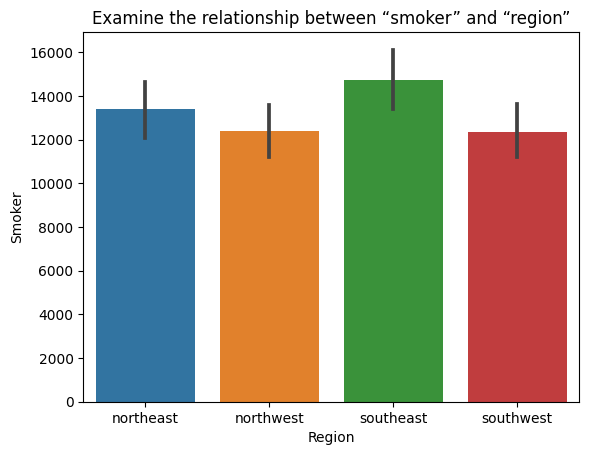

In [ ]:
sns.barplot(x="region", y="charges", data=df)
plt.xlabel('Region')
plt.ylabel('Smoker')
plt.title('Examine the relationship between “smoker” and “region”')
plt.show()

Text(0.5, 1.0, 'Examine the relationship between “sex” and “bmi”')

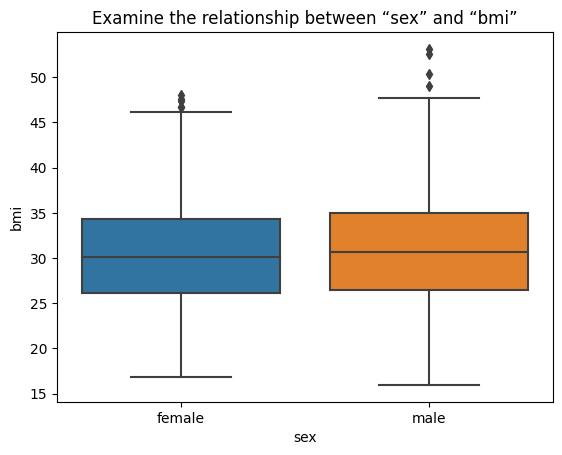

In [ ]:
sns.boxplot(x = 'sex',y = 'bmi',data = df)
plt.title('Examine the relationship between “sex” and “bmi”')


Text(0.5, 1.0, 'Examine the relationship between “sex” and “bmi”')

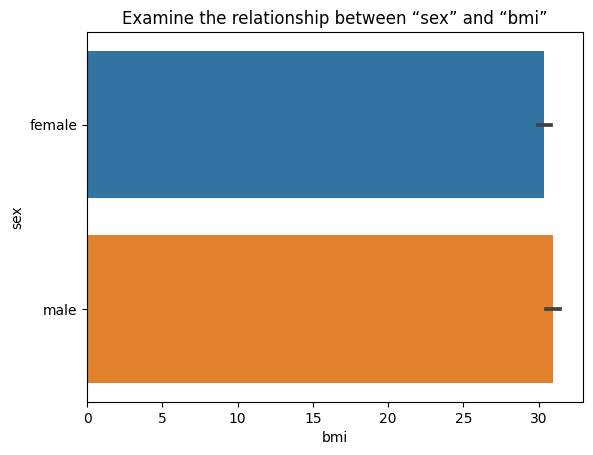

In [ ]:
sns.barplot(x = 'bmi',y = 'sex',data = df)
plt.title('Examine the relationship between “sex” and “bmi”')


<Axes: ylabel='sex'>

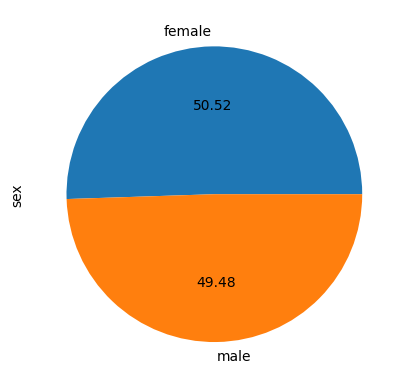

In [ ]:
df["sex"].value_counts().plot(kind="pie", autopct='%.2f',labels=df["sex"].unique())
#cinsiyet dağılımı esit

<Axes: ylabel='smoker'>

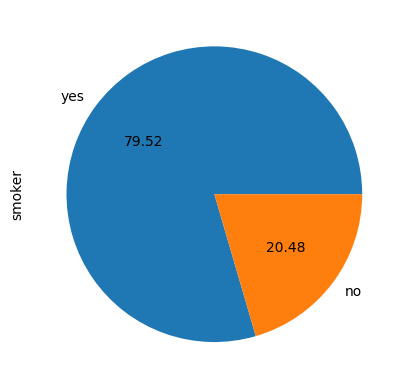

In [ ]:
df["smoker"].value_counts().plot(kind="pie", autopct='%.2f',labels=df["smoker"].unique())
# sigara icenler daha fazla

<Axes: ylabel='children'>

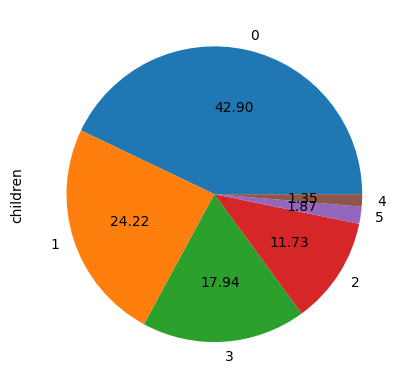

In [ ]:
df["children"].value_counts().plot(kind="pie", autopct='%.2f',labels=df["children"].unique())
# 0 yaşındaki cocuklar daha fazla 4 5 daha az

<Axes: ylabel='region'>

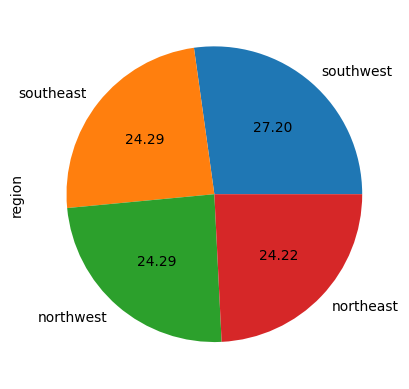

In [ ]:
df["region"].value_counts().plot(kind="pie", autopct='%.2f',labels=df["region"].unique())
#genel olarak kategoriler dengeli görünüyor

<Axes: xlabel='region', ylabel='children'>

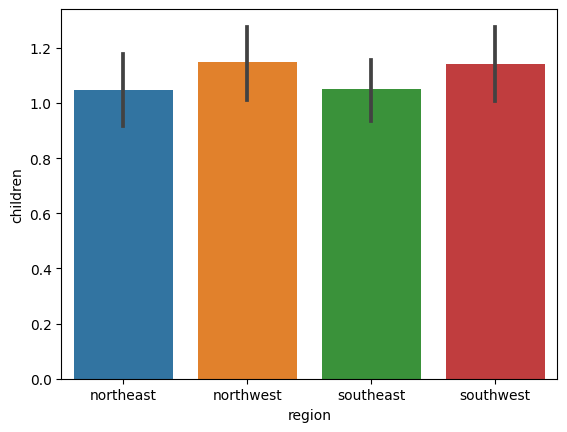

In [ ]:
sns.barplot(x = 'region',y = 'children',data = df)
#Find the "region" with the most "children".

<Axes: xlabel='age', ylabel='bmi'>

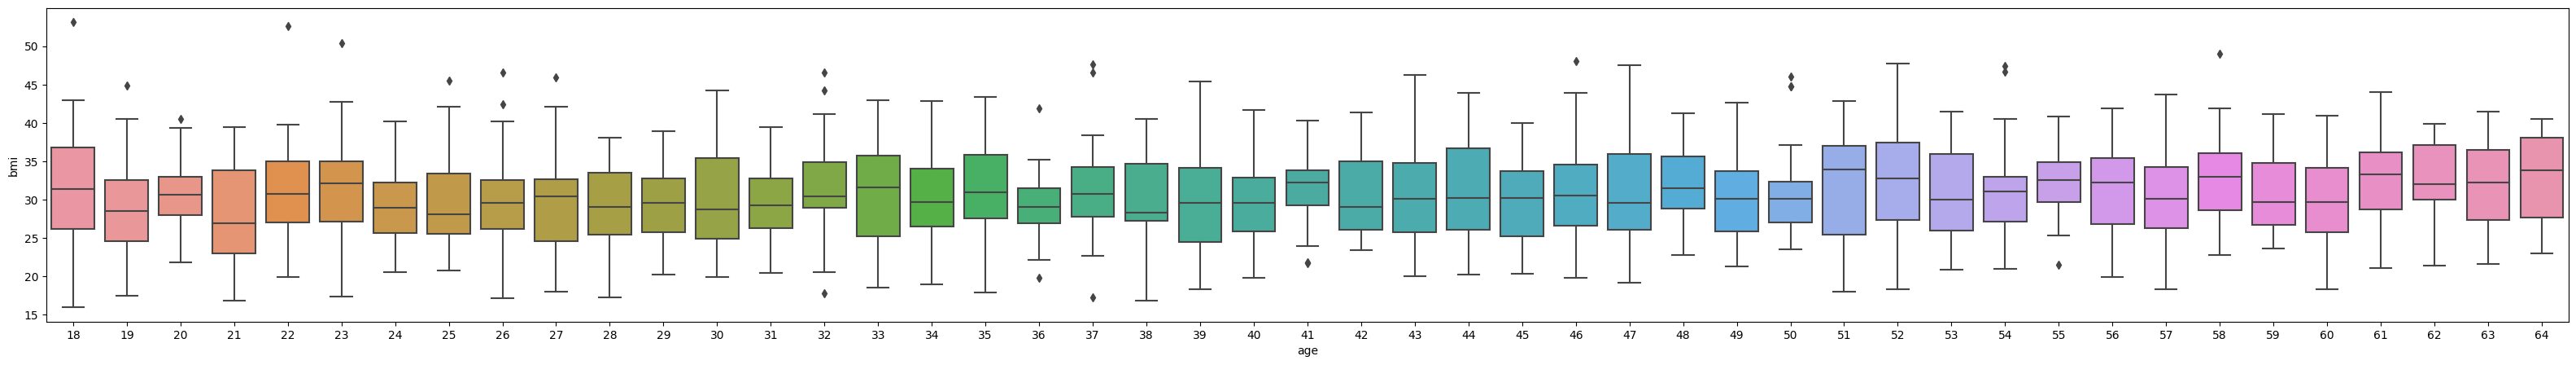

In [ ]:
fig, ax = plt.subplots(figsize=(40, 5))
sns.boxplot(x = 'age',y = 'bmi',data = df)
#Examine the relationship between “age” and “bmi”.

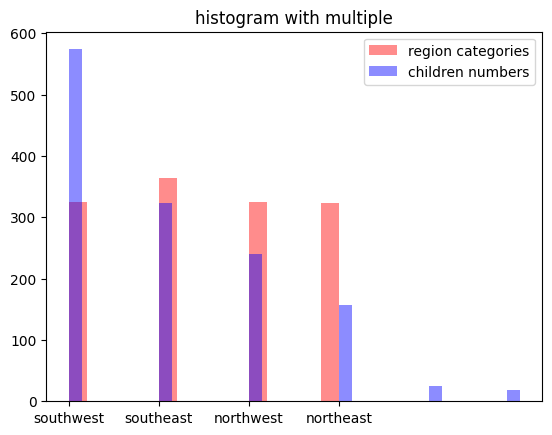

In [ ]:
plt.hist(df['region'], bins=15, alpha=0.45, color='red')
plt.hist(df['children'], bins=35, alpha=0.45, color='blue')

plt.title("histogram with multiple")

plt.legend(['region categories', 'children numbers'])

plt.show()
#Find the "region" with the most "children".

<Axes: xlabel='bmi', ylabel='children'>

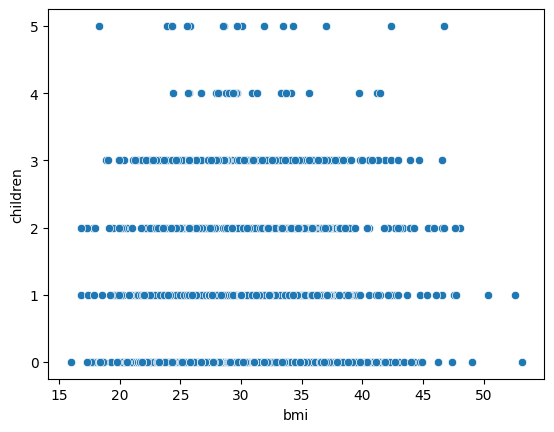

In [ ]:
sns.scatterplot(x = 'bmi',y = 'children',data = df)
#Examine the relationship between “bmi” and “children”.

<Axes: xlabel='bmi'>

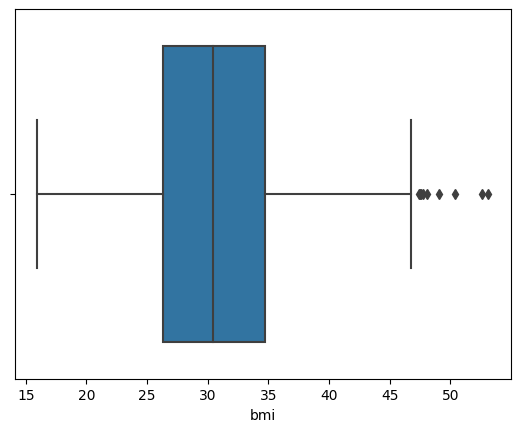

In [ ]:
sns.boxplot(x="bmi", data = df)
#above 46, there are outliers in bmi

<Axes: xlabel='bmi', ylabel='charges'>

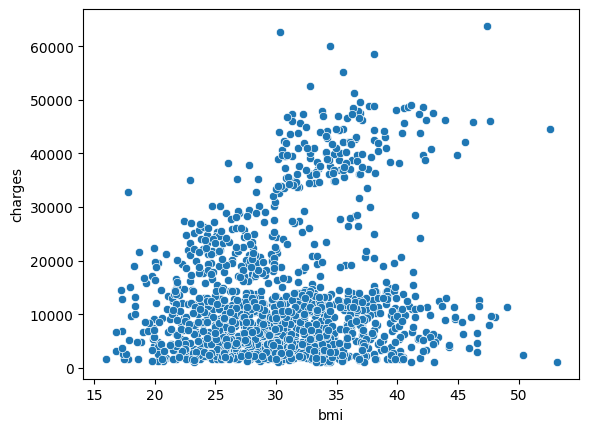

In [ ]:
sns.scatterplot(x = 'bmi',y = 'charges',data = df)
#Examine the relationship between “bmi” and “charges”.

<Axes: xlabel='bmi', ylabel='smoker'>

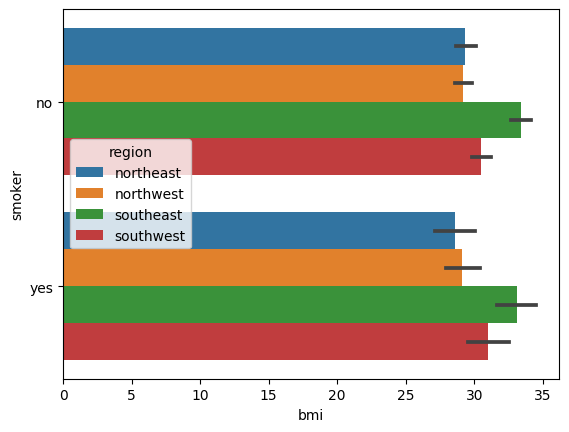

In [ ]:
df['region'] = df['region'].astype('category')
df['smoker'] = df['smoker'].astype('category')


sns.barplot(x="bmi", y="smoker", hue="region",  data = df)
#Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

<Axes: >

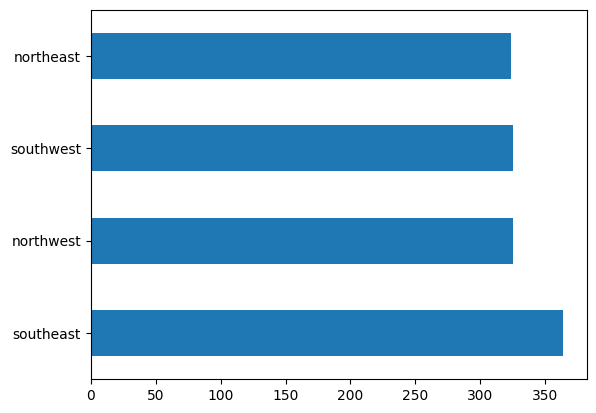

In [ ]:
df['region'].value_counts().plot.barh()

<Axes: >

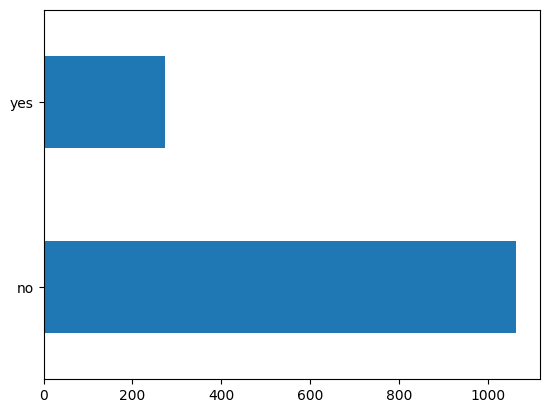

In [ ]:
df['smoker'].value_counts().plot.barh()

Preprocessing Step

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

Burada amacım hem one hot encoding hem de label encoding kullanmaktı

In [24]:
label_encoder = LabelEncoder()
df['after_label_sex'] = label_encoder.fit_transform(df['sex'])
df.head()

,age,sex,bmi,children,smoker,region,charges,after_label_sex
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [25]:
label_encoder = LabelEncoder()
df['after_label_smoker'] = label_encoder.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges,after_label_sex,after_label_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [26]:
# pandas'ın get_dummies fonksiyonu ile One-Hot Encoding yapiyoruz
region_encoded = pd.get_dummies(df['region'], prefix='region', drop_first=True)

# Oluşturulan One-Hot Encoding sütunları ana veri setine ekliyoruz
df_encoded = pd.concat([df, region_encoded], axis=1)

# One-Hot Encoding sütunları ekledikten sonra orijinal "region" sütununu çıkarın
df_encoded = df_encoded.drop('region', axis=1)

df_encoded

,age,sex,bmi,children,smoker,charges,after_label_sex,after_label_smoker,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,0,0,1


Outlierları belirleyip outlier detection yaptım

In [27]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[(df['charges'] < lower_limit) | (df['charges'] > upper_limit)]

,age,sex,bmi,children,smoker,region,charges,after_label_sex,after_label_smoker
14,27,male,42.130,0,yes,southeast,39611.75770,1,1
19,30,male,35.300,0,yes,southwest,36837.46700,1,1
23,34,female,31.920,1,yes,northeast,37701.87680,0,1
29,31,male,36.300,2,yes,southwest,38711.00000,1,1
30,22,male,35.600,0,yes,southwest,35585.57600,1,1
...,...,...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309,1,1
1301,62,male,30.875,3,yes,northwest,46718.16325,1,1
1303,43,male,27.800,0,yes,southwest,37829.72420,1,1
1313,19,female,34.700,2,yes,southwest,36397.57600,0,1


Bağımlı ve Bağımsız değişkenleri belirledim. Burada tahmin etmeye çalıştığımız charge kısmı.

In [29]:
# Bağımsız değişkenler (X)
X = df_encoded[['bmi', 'age', 'children', 'after_label_sex', 'after_label_smoker', 'region_northwest', 'region_southeast', 'region_southwest']]

# Bağımlı değişken (y)
y = df_encoded['charges']

In [47]:
X

,bmi,age,children,after_label_sex,after_label_smoker,region_northwest,region_southeast,region_southwest
0,27.900,19,0,0,1,0,0,1
1,33.770,18,1,1,0,0,1,0
2,33.000,28,3,1,0,0,1,0
3,22.705,33,0,1,0,1,0,0
4,28.880,32,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,30.970,50,3,1,0,1,0,0
1334,31.920,18,0,0,0,0,0,0
1335,36.850,18,0,0,0,0,1,0
1336,25.800,21,0,0,0,0,0,1


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Min Max Scaler ve StandartScaler ile Normalizasyon yaptım

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Kullandıiım Modeller
*   Lineer Regression
*   Decision Tree
*   Random Forest
*   Gradient Boost

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Decision Tree Regresyon modelini oluşturun ve eğitin
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Regresyon metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# İyileştirilmiş R-kare hesaplaması
n = len(y_test)
p = X_test.shape[1]  # Bağımsız değişken sayısı
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 43460499.47845944
Mean Absolute Error: 3164.3292740149254
R-squared: 0.7200589076583703
Adjusted R-squared: 0.711412078551293




*   Mean Squared Error (MSE): Tahmin edilen değerler ile gerçek değerler arasındaki ortalama karesel hatayı gösterir.
*   Mean Absolute Error (MAE): Tahmin edilen değerler ile gerçek değerler arasındaki ortalama mutlak hatayı gösterir.
*  R-squared (R-kare): Modelin açıkladığı varyansın oranını ifade eder. 1'e ne kadar yakınsa, modelin veriyi ne kadar iyi açıkladığını gösterir.






In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Decision Tree Regresyon modelini oluşturun ve eğitin
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Regresyon metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# İyileştirilmiş R-kare hesaplaması
n = len(y_test)
p = X_test.shape[1]  # Bağımsız değişken sayısı
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 41879028.838250615
Mean Absolute Error: 3200.577021880597
R-squared: 0.7302455972693744
Adjusted R-squared: 0.7219134149456485


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Random Forest Regresyon modelini oluşturun ve eğitin
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Regresyon metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 21248583.068204455
Mean Absolute Error: 2567.865067333885
R-squared: 0.863132002020059


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Gradient Boosting Regresyon modelini oluşturun ve eğitin
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Regresyon metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 18745176.47586223
Mean Absolute Error: 2443.4832623768784
R-squared: 0.8792571359795264


10 Fold Cross Validation ile hata oranını azaltmaya çalıştım. Random forest için kullandım çünkü en yüksek başarı ondaydı

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regresyon modelini oluşturun
model = RandomForestRegressor()

# Cross-validation uygulayın
cv_scores = cross_val_score(model, X, y.ravel(), cv=10, scoring='neg_mean_squared_error')

# Negatif hataları pozitife çevirerek gerçek hataları elde edin
mse_scores = -cv_scores

# Her bir cross-validation iterasyonunun MSE değerini yazdırın
for i, mse in enumerate(mse_scores, start=1):
    print(f"CV {i} MSE: {mse}")

# MSE değerlerinin ortalamasını hesaplayın
average_mse = np.mean(mse_scores)
print("Average MSE:", average_mse)

CV 1 MSE: 23202307.508851215
CV 2 MSE: 23440642.91200021
CV 3 MSE: 25609603.172506694
CV 4 MSE: 31570439.287483517
CV 5 MSE: 24007395.553401653
CV 6 MSE: 14301608.042137364
CV 7 MSE: 20987676.730617296
CV 8 MSE: 29460201.018000133
CV 9 MSE: 21235051.67844465
CV 10 MSE: 24926113.436666746
Average MSE: 23874103.93401095


MSE için 6. Fold (CV 6) daha başarılı

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score

# Random Forest Regresyon modelini oluşturun
model = RandomForestRegressor()

# Cross-validation için skor fonksiyonlarını tanımlayın
scoring = {'r2': 'r2', 'mae': make_scorer(mean_absolute_error)}

# Cross-validation uygulayın
r2_scores = cross_val_score(model, X, y.ravel(), cv=10, scoring='r2')
mae_scores = cross_val_score(model, X, y.ravel(), cv=10, scoring=make_scorer(mean_absolute_error))

# Her bir cross-validation iterasyonunun R-kare ve MAE değerlerini yazdırın
for i, (r2, mae) in enumerate(zip(r2_scores, mae_scores), start=1):
    print(f"CV {i} R-squared: {r2:.3f}, MAE: {mae:.3f}")

# R-kare ve MAE değerlerinin ortalamalarını hesaplayın
average_r2 = np.mean(r2_scores)
average_mae = np.mean(mae_scores)
print("Average R-squared:", average_r2)
print("Average MAE:", average_mae)

CV 1 R-squared: 0.860, MAE: 2776.626
CV 2 R-squared: 0.842, MAE: 2845.661
CV 3 R-squared: 0.820, MAE: 2950.854
CV 4 R-squared: 0.733, MAE: 2996.223
CV 5 R-squared: 0.850, MAE: 2777.974
CV 6 R-squared: 0.891, MAE: 2345.840
CV 7 R-squared: 0.855, MAE: 2451.179
CV 8 R-squared: 0.793, MAE: 2882.920
CV 9 R-squared: 0.842, MAE: 2879.334
CV 10 R-squared: 0.861, MAE: 2596.252
Average R-squared: 0.8346174691195302
Average MAE: 2750.2862584322147
